In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score, precision_score, f1_score
import numpy as np
from sklearn import model_selection
from sklearn.model_selection import cross_validate

In [3]:
# Functions to draw graphs 

def draw_graph(train,test,t):
    values = [train,test]
    x = np.arange(1,6)
    plt.figure(figsize=(10,5))
    plt.xlabel("Trial")
    if t == 'A':
        plt.ylabel("Accuracy")
        plt.axhline(y=train[5], color='r',label = 'trainAvg')
        plt.axhline(y=test[5],color="b",label = 'testAvg')
    if t == 'P':
        plt.ylabel('Precision')
        plt.axhline(y=train[5], color='r',label = 'trainPr')
        plt.axhline(y=test[5],color="b",label = 'testPr')
    if t == 'F':
        plt.ylabel('F-Measure')
        plt.axhline(y=train[5], color='r',label = 'trainF')
        plt.axhline(y=test[5],color="b",label = 'testF')
    plt.plot(x, train[0:5], 'rx--', label = 'train')
    plt.plot(x, test[0:5], "bo--", label = 'test')
    
    plt.legend()
    plt.show()
    print('Train: ',np.round(values[0], 3))
    print('Test: ',np.round(values[1],3))

def draw_graph2(arr,t):
    x = np.arange(10)
    plt.figure(figsize=(10,5))
    plt.xlabel("Trial")
    if t == 'A':
        plt.ylabel("Accuracy")
        print('Accuracy: ',np.round(arr, 3))
    if t == 'P':
        plt.ylabel('Precision')
        print('Precision: ',np.round(arr, 3))
    if t == 'F':
        plt.ylabel('F-Measure')
        print('F-Measure: ',np.round(arr, 3))
    plt.plot(x, arr[0:10], 'gx--')
    plt.axhline(y=arr[10], color='g', label = 'Avg')
    plt.legend()
    plt.show()

In [4]:
# Import dataset and remove letters so its suitable for model
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data', sep=' ', header=None,)
data.columns = ['checking account', 'duration', 'credit history', 'purpose', 'credit amount','Savings account/bonds','employed since','rate in disposible %','married/sex','other debters','present residence since','property','age','other installment plans','housing','num existing credits', 'job', 'num people liable','phone #', 'foreign worker','Class']
data = data.replace({'A':''}, regex=True)
data

,checking account,duration,credit history,purpose,credit amount,Savings account/bonds,employed since,rate in disposible %,married/sex,other debters,...,property,age,other installment plans,housing,num existing credits,job,num people liable,phone #,foreign worker,Class
0,11,6,34,43,1169,65,75,4,93,101,...,121,67,143,152,2,173,1,192,201,1
1,12,48,32,43,5951,61,73,2,92,101,...,121,22,143,152,1,173,1,191,201,2
2,14,12,34,46,2096,61,74,2,93,101,...,121,49,143,152,1,172,2,191,201,1
3,11,42,32,42,7882,61,74,2,93,103,...,122,45,143,153,1,173,2,191,201,1
4,11,24,33,40,4870,61,73,3,93,101,...,124,53,143,153,2,173,2,191,201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,14,12,32,42,1736,61,74,3,92,101,...,121,31,143,152,1,172,1,191,201,1
996,11,30,32,41,3857,61,73,4,91,101,...,122,40,143,152,1,174,1,192,201,1
997,14,12,32,43,804,61,75,4,93,101,...,123,38,143,152,1,173,1,191,201,1
998,11,45,32,43,1845,61,73,4,93,101,...,124,23,143,153,1,173,1,192,201,2


## Decision Tree

In [5]:
Y = data['Class']
X = data.drop(['Class'],axis=1)

# set up metric variables
trainAcc = np.zeros(6)
testAcc = np.zeros(6)
trainPr = np.zeros(6)
testPr = np.zeros(6)
trainF = np.zeros(6)
testF = np.zeros(6)

# set up loop to run model 5 times in order to compare results
# Holdout method using 90% training set and 10% testing set without entropy
index = 0
i = 0
while i < 5:
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1,train_size=0.9)
    model = tree.DecisionTreeClassifier(max_depth=5)
    model = model.fit(X_train, Y_train)
    Y_predTrain = model.predict(X_train)
    Y_predTest = model.predict(X_test)
    
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    trainPr[index] = precision_score(Y_train, Y_predTrain)
    testPr[index] = precision_score(Y_test, Y_predTest)
    trainF[index] = f1_score(Y_train, Y_predTrain)
    testF[index] = f1_score(Y_test, Y_predTest)
    index += 1
    i += 1

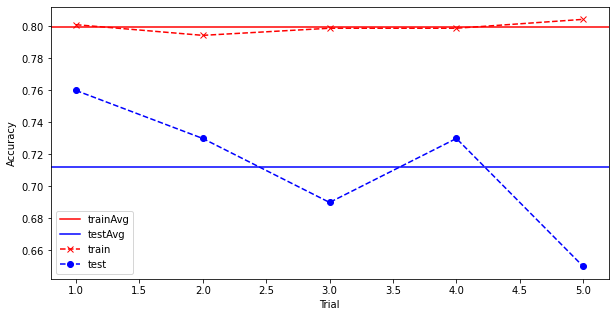

Train:  [0.801 0.794 0.799 0.799 0.804 0.8  ]
Test:  [0.76  0.73  0.69  0.73  0.65  0.712]


In [6]:
trainAcc[5] = (trainAcc[0] + trainAcc[1] + trainAcc[2] + trainAcc[3] + trainAcc[4]) / 5
testAcc[5] = (testAcc[0] + testAcc[1] + testAcc[2] + testAcc[3] + testAcc[4]) / 5

draw_graph(trainAcc,testAcc,'A')

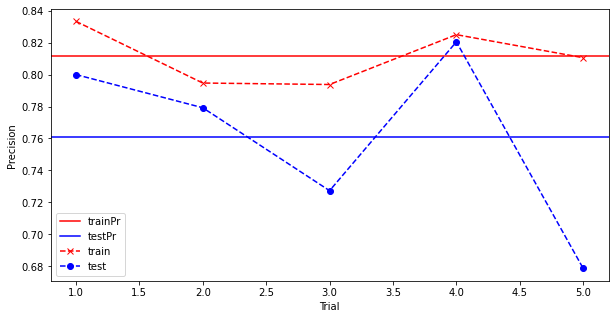

Train:  [0.833 0.795 0.794 0.825 0.811 0.811]
Test:  [0.8   0.779 0.727 0.821 0.679 0.761]


In [7]:
trainPr[5] = (trainPr[0] + trainPr[1] + trainPr[2] + trainPr[3] + trainPr[4]) / 5
testPr[5] = (testPr[0] + testPr[1] + testPr[2] + testPr[3] + testPr[4]) / 5

draw_graph(trainPr,testPr,'P')

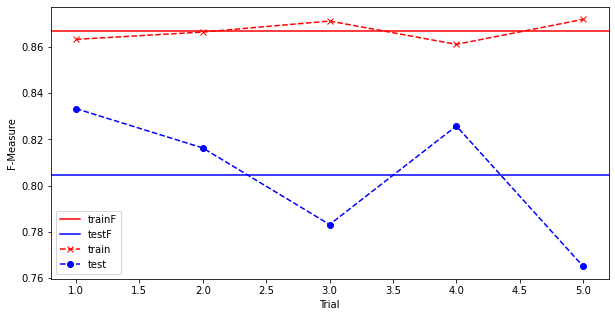

Train:  [0.863 0.866 0.871 0.861 0.872 0.867]
Test:  [0.833 0.816 0.783 0.826 0.765 0.805]


In [8]:
trainF[5] = (trainF[0] + trainF[1] + trainF[2] + trainF[3] + trainF[4]) / 5
testF[5] = (testF[0] + testF[1] + testF[2] + testF[3] + testF[4]) / 5

draw_graph(trainF, testF, 'F')

In [9]:
# 10 fold cross validation method without entropy

Y = data['Class']
X = data.drop(['Class'],axis=1)

k = 10
kf = model_selection.KFold(n_splits=k, random_state=None)
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'f1_score' : make_scorer(f1_score)}

model = tree.DecisionTreeClassifier(max_depth=5)
result = cross_validate(model , X, Y, cv = kf, scoring=scoring)

Accuracy:  [0.79  0.68  0.73  0.75  0.75  0.57  0.67  0.75  0.73  0.61  0.703]


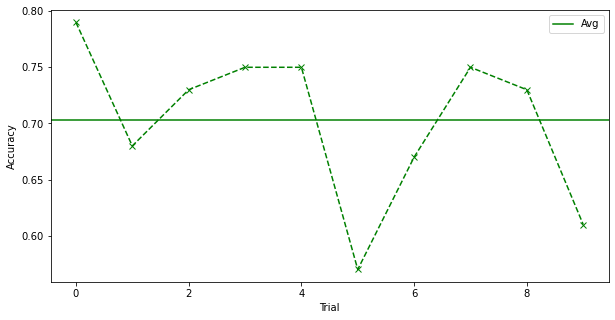

In [10]:
accuracy = list(result['test_accuracy'])
accuracy.append(result['test_accuracy'].mean())
draw_graph2(accuracy,'A')


Precision:  [0.897 0.725 0.857 0.813 0.79  0.603 0.74  0.787 0.789 0.71  0.771]


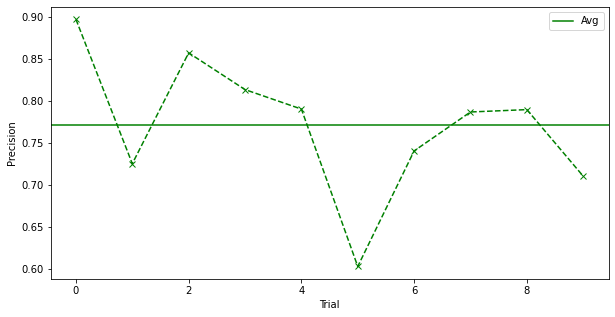

In [11]:
precision = list(result['test_precision'])
precision.append(result['test_precision'].mean())
draw_graph2(precision,'P')

F-Measure:  [0.853 0.784 0.816 0.83  0.837 0.686 0.776 0.825 0.816 0.715 0.794]


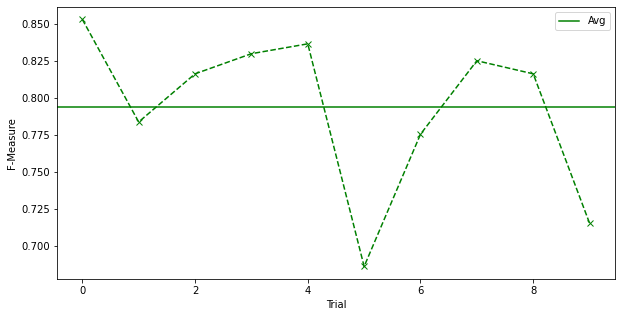

In [12]:
f_measure = list(result['test_f1_score'])
f_measure.append(result['test_f1_score'].mean())
draw_graph2(f_measure,'F')

In [13]:
# Holdout method using 90% training set and 10% testing set with entropy

Y = data['Class']
X = data.drop(['Class'],axis=1)

trainAcc = np.zeros(6)
testAcc = np.zeros(6)
trainPr = np.zeros(6)
testPr = np.zeros(6)
trainF = np.zeros(6)
testF = np.zeros(6)

index = 0
i = 0
while i < 5:

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1,train_size=0.9)
    clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=5)
    clf = clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    trainPr[index] = precision_score(Y_train, Y_predTrain)
    testPr[index] = precision_score(Y_test, Y_predTest)
    trainF[index] = f1_score(Y_train, Y_predTrain)
    testF[index] = f1_score(Y_test, Y_predTest)
    index += 1
    i += 1


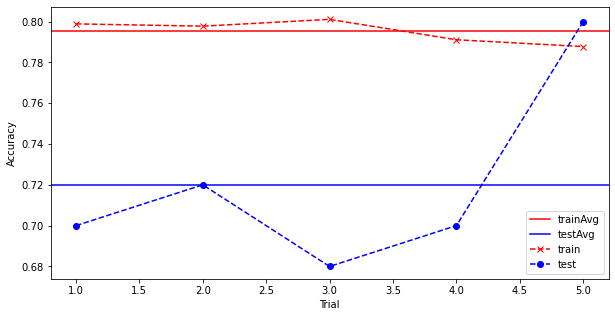

Train:  [0.799 0.798 0.801 0.791 0.788 0.795]
Test:  [0.7  0.72 0.68 0.7  0.8  0.72]


In [14]:
trainAcc[5] = (trainAcc[0] + trainAcc[1] + trainAcc[2] + trainAcc[3] + trainAcc[4]) / 5
testAcc[5] = (testAcc[0] + testAcc[1] + testAcc[2] + testAcc[3] + testAcc[4]) / 5

draw_graph(trainAcc,testAcc,'A')

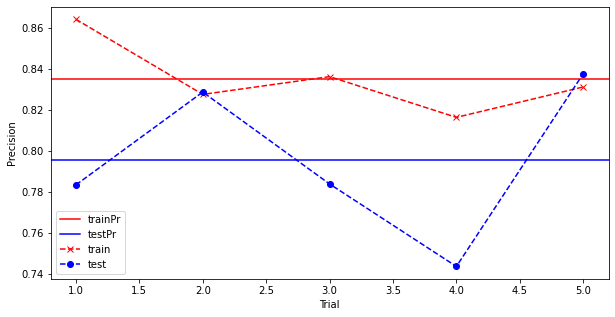

Train:  [0.864 0.827 0.836 0.816 0.831 0.835]
Test:  [0.783 0.829 0.784 0.744 0.838 0.795]


In [15]:
trainPr[5] = (trainPr[0] + trainPr[1] + trainPr[2] + trainPr[3] + trainPr[4]) / 5
testPr[5] = (testPr[0] + testPr[1] + testPr[2] + testPr[3] + testPr[4]) / 5

draw_graph(trainPr,testPr,'P')

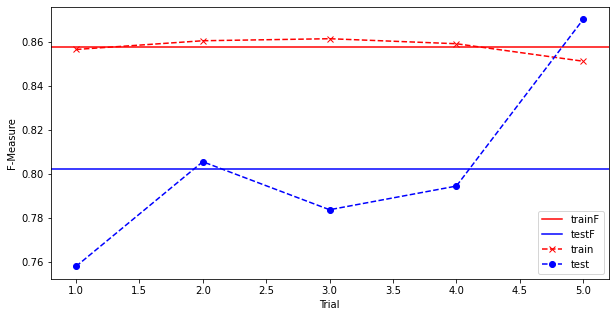

Train:  [0.856 0.86  0.861 0.859 0.851 0.858]
Test:  [0.758 0.806 0.784 0.795 0.87  0.802]


In [16]:
trainF[5] = (trainF[0] + trainF[1] + trainF[2] + trainF[3] + trainF[4]) / 5
testF[5] = (testF[0] + testF[1] + testF[2] + testF[3] + testF[4]) / 5

draw_graph(trainF,testF,'F')

In [17]:
# 10 fold cross validation method with entropy 

Y = data['Class']
X = data.drop(['Class'],axis=1)

k = 10
kf = model_selection.KFold(n_splits=k, random_state=None)
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'f1_score' : make_scorer(f1_score)}

model = tree.DecisionTreeClassifier(criterion='entropy',max_depth=5)
result = cross_validate(model , X, Y, cv = kf, scoring=scoring)

Accuracy:  [0.79  0.69  0.72  0.69  0.77  0.6   0.7   0.74  0.75  0.69  0.714]


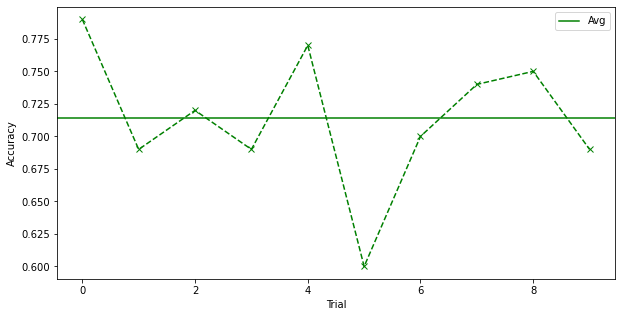

In [18]:
accuracy1 = list(result['test_accuracy'])
accuracy1.append(result['test_accuracy'].mean())
draw_graph2(accuracy1,'A')


Precision:  [0.909 0.734 0.845 0.847 0.802 0.614 0.77  0.792 0.803 0.803 0.792]


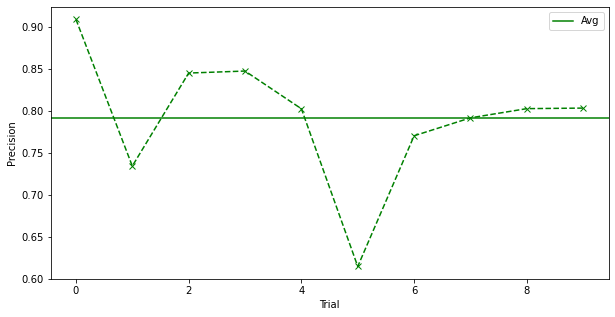

In [19]:
precision1 = list(result['test_precision'])
precision1.append(result['test_precision'].mean())
draw_graph2(precision1,'P')

F-Measure:  [0.851 0.789 0.811 0.763 0.85  0.718 0.792 0.814 0.83  0.76  0.798]


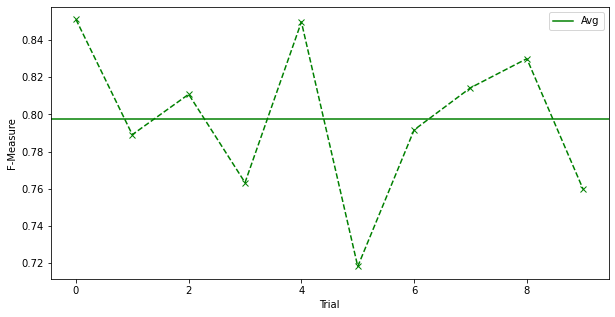

In [20]:
f_measure1 = list(result['test_f1_score'])
f_measure1.append(result['test_f1_score'].mean())
draw_graph2(f_measure1,'F')

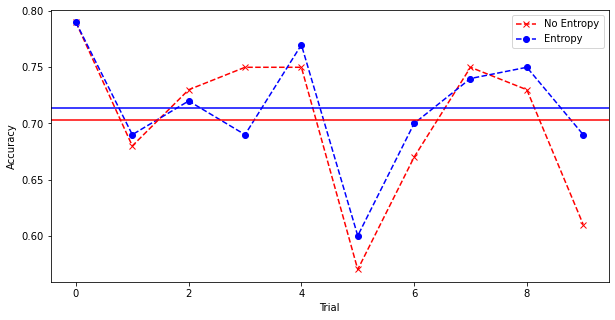

In [21]:
values = [accuracy,accuracy1]
x = np.arange(10)
plt.figure(figsize=(10,5))
plt.xlabel("Trial")
plt.ylabel('Accuracy')
plt.plot(x, values[0][0:10], 'rx--',label='No Entropy')
plt.plot(x,values[1][0:10],'bo--',label='Entropy')
plt.axhline(y=values[0][10], color='r')
plt.axhline(y=values[1][10], color='b')
plt.legend()
plt.show()

Text(0, 0.5, 'Accuracy')

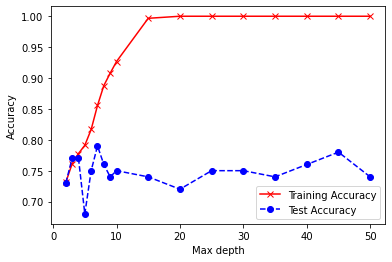

In [22]:
# Investigating the effect of tress depth on results 

Y = data['Class']
X = data.drop(['Class'],axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    model = tree.DecisionTreeClassifier(max_depth=depth)
    model = model.fit(X_train, Y_train)
    Y_predTrain = model.predict(X_train)
    Y_predTest = model.predict(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1
    
    
plt.plot(maxdepths,trainAcc,'rx-',maxdepths,testAcc,'bo--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

### According to this analysis the best technique is the holdout method with entropy as the impurity measure as this gave us the highest testing accuracy value.